<a href="https://colab.research.google.com/github/jjuandiego099/ProyectoIA/blob/main/ProyectoCancerPulmon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shantanugarg274/lung-cancer-prediction-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/shantanugarg274/lung-cancer-prediction-dataset/versions/1


In [47]:
import pandas as pd

df = pd.read_csv(path + "/Lung Cancer Dataset.csv")
df.head()

,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE,PULMONARY_DISEASE
0,68,1,1,1,1,1,0,57.831178,0,0,1,1,95.977287,1,0,0,0,NO
1,81,1,1,0,0,1,1,47.694835,1,1,0,1,97.184483,0,0,0,0,YES
2,58,1,1,0,0,0,0,59.577435,0,1,1,0,94.974939,0,0,0,0,NO
3,44,0,1,0,1,1,0,59.785767,0,1,0,1,95.187900,0,0,0,0,YES
4,72,0,1,1,1,1,1,59.733941,0,1,0,1,93.503008,0,0,0,0,YES


In [48]:
#nulos
df.isnull().sum()

,0
AGE,0
GENDER,0
SMOKING,0
FINGER_DISCOLORATION,0
MENTAL_STRESS,0
EXPOSURE_TO_POLLUTION,0
LONG_TERM_ILLNESS,0
ENERGY_LEVEL,0
IMMUNE_WEAKNESS,0
BREATHING_ISSUE,0


In [49]:
#analizar las features
df.describe()

,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE
count,5000.000000,5000.000000,5000.000000,5000.0000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,57.222800,0.501200,0.666400,0.6012,0.539800,0.516000,0.439200,55.032043,0.394800,0.80040,0.354200,0.698200,94.991029,0.600600,0.301800,0.204000,0.209600
std,15.799224,0.500049,0.471546,0.4897,0.498463,0.499794,0.496339,7.913083,0.488857,0.39974,0.478318,0.459085,1.481048,0.489824,0.459085,0.403009,0.407064
min,30.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,23.258308,0.000000,0.00000,0.000000,0.000000,89.923133,0.000000,0.000000,0.000000,0.000000
25%,44.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,49.440685,0.000000,1.00000,0.000000,0.000000,93.973176,0.000000,0.000000,0.000000,0.000000
50%,57.000000,1.000000,1.000000,1.0000,1.000000,1.000000,0.000000,55.050421,0.000000,1.00000,0.000000,1.000000,94.974073,1.000000,0.000000,0.000000,0.000000
75%,71.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,60.323320,1.000000,1.00000,1.000000,1.000000,95.989272,1.000000,1.000000,0.000000,0.000000
max,84.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,83.046971,1.000000,1.00000,1.000000,1.000000,99.795786,1.000000,1.000000,1.000000,1.000000


In [50]:
# prompt: transforma el nombre de las columnas al primera letra mayusculas las demas minusculas

df.rename(columns=lambda x: x.title(), inplace=True)
df.head()


,Age,Gender,Smoking,Finger_Discoloration,Mental_Stress,Exposure_To_Pollution,Long_Term_Illness,Energy_Level,Immune_Weakness,Breathing_Issue,Alcohol_Consumption,Throat_Discomfort,Oxygen_Saturation,Chest_Tightness,Family_History,Smoking_Family_History,Stress_Immune,Pulmonary_Disease
0,68,1,1,1,1,1,0,57.831178,0,0,1,1,95.977287,1,0,0,0,NO
1,81,1,1,0,0,1,1,47.694835,1,1,0,1,97.184483,0,0,0,0,YES
2,58,1,1,0,0,0,0,59.577435,0,1,1,0,94.974939,0,0,0,0,NO
3,44,0,1,0,1,1,0,59.785767,0,1,0,1,95.187900,0,0,0,0,YES
4,72,0,1,1,1,1,1,59.733941,0,1,0,1,93.503008,0,0,0,0,YES


In [51]:
# prompt: muestrame las features binarias sin contar la etiqueta

binary_features = [col for col in df.columns if df[col].nunique() == 2 and col != 'Lung Cancer']
binary_features


['Gender',
 'Smoking',
 'Finger_Discoloration',
 'Mental_Stress',
 'Exposure_To_Pollution',
 'Long_Term_Illness',
 'Immune_Weakness',
 'Breathing_Issue',
 'Alcohol_Consumption',
 'Throat_Discomfort',
 'Chest_Tightness',
 'Family_History',
 'Smoking_Family_History',
 'Stress_Immune',
 'Pulmonary_Disease']

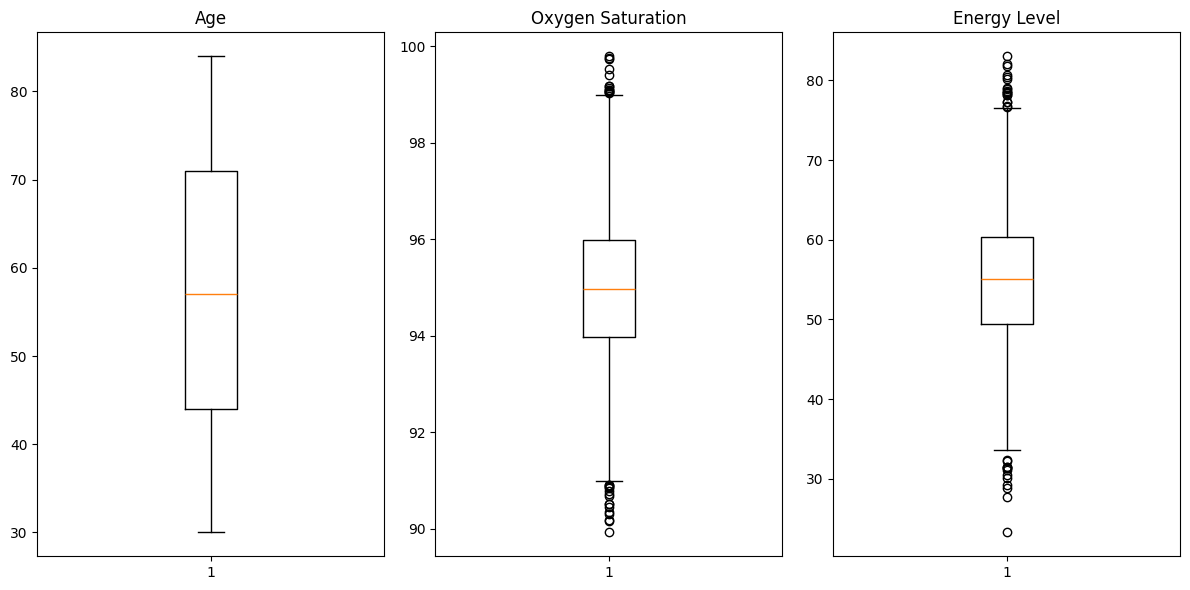

In [52]:
# prompt: genera una boxplolt de Age Oxygen_Saturation y EnergyLevel

import matplotlib.pyplot as plt

# Create boxplots for Age, Oxygen_Saturation, and EnergyLevel
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.boxplot(df['Age'])
plt.title('Age')

plt.subplot(1, 3, 2)
plt.boxplot(df['Oxygen_Saturation'])
plt.title('Oxygen Saturation')

plt.subplot(1, 3, 3)
plt.boxplot(df['Energy_Level'])
plt.title('Energy Level')

plt.tight_layout()
plt.show()


In [53]:
#manejo de outliers transformandolos en bigote superior e inferior respectivamente
import pandas as pd

# Suponiendo que df es tu DataFrame
p5_energy, p95_energy = df['Energy_Level'].quantile([0.05, 0.95])
p5_oxygen, p95_oxygen = df['Oxygen_Saturation'].quantile([0.05, 0.95])

# Aplicar Winsorización (limitar valores extremos)
df['Energy_Level'] = df['Energy_Level'].clip(p5_energy, p95_energy)
df['Oxygen_Saturation'] = df['Oxygen_Saturation'].clip(p5_oxygen, p95_oxygen)


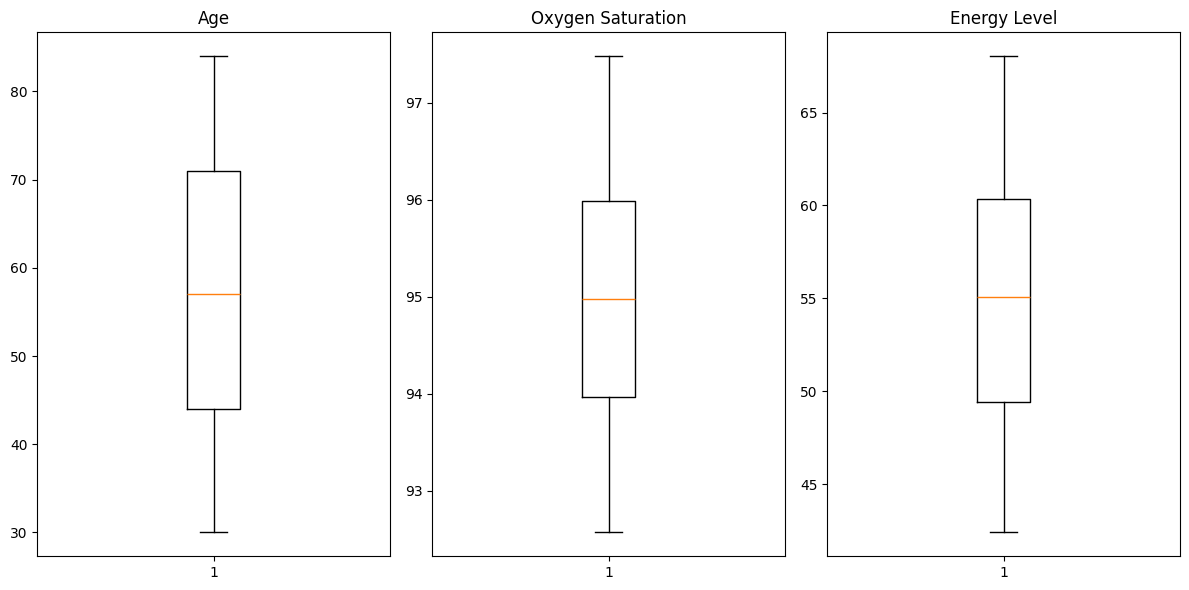

In [54]:
import matplotlib.pyplot as plt

# Create boxplots for Age, Oxygen_Saturation, and EnergyLevel
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.boxplot(df['Age'])
plt.title('Age')

plt.subplot(1, 3, 2)
plt.boxplot(df['Oxygen_Saturation'])
plt.title('Oxygen Saturation')

plt.subplot(1, 3, 3)
plt.boxplot(df['Energy_Level'])
plt.title('Energy Level')

plt.tight_layout()
plt.show()


In [55]:
#usare labelencoder para Pulmonary_Disease y guardar en joblib
import joblib as jb
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Pulmonary_Disease'] = le.fit_transform(df['Pulmonary_Disease'])

df.head()

,Age,Gender,Smoking,Finger_Discoloration,Mental_Stress,Exposure_To_Pollution,Long_Term_Illness,Energy_Level,Immune_Weakness,Breathing_Issue,Alcohol_Consumption,Throat_Discomfort,Oxygen_Saturation,Chest_Tightness,Family_History,Smoking_Family_History,Stress_Immune,Pulmonary_Disease
0,68,1,1,1,1,1,0,57.831178,0,0,1,1,95.977287,1,0,0,0,0
1,81,1,1,0,0,1,1,47.694835,1,1,0,1,97.184483,0,0,0,0,1
2,58,1,1,0,0,0,0,59.577435,0,1,1,0,94.974939,0,0,0,0,0
3,44,0,1,0,1,1,0,59.785767,0,1,0,1,95.187900,0,0,0,0,1
4,72,0,1,1,1,1,1,59.733941,0,1,0,1,93.503008,0,0,0,0,1


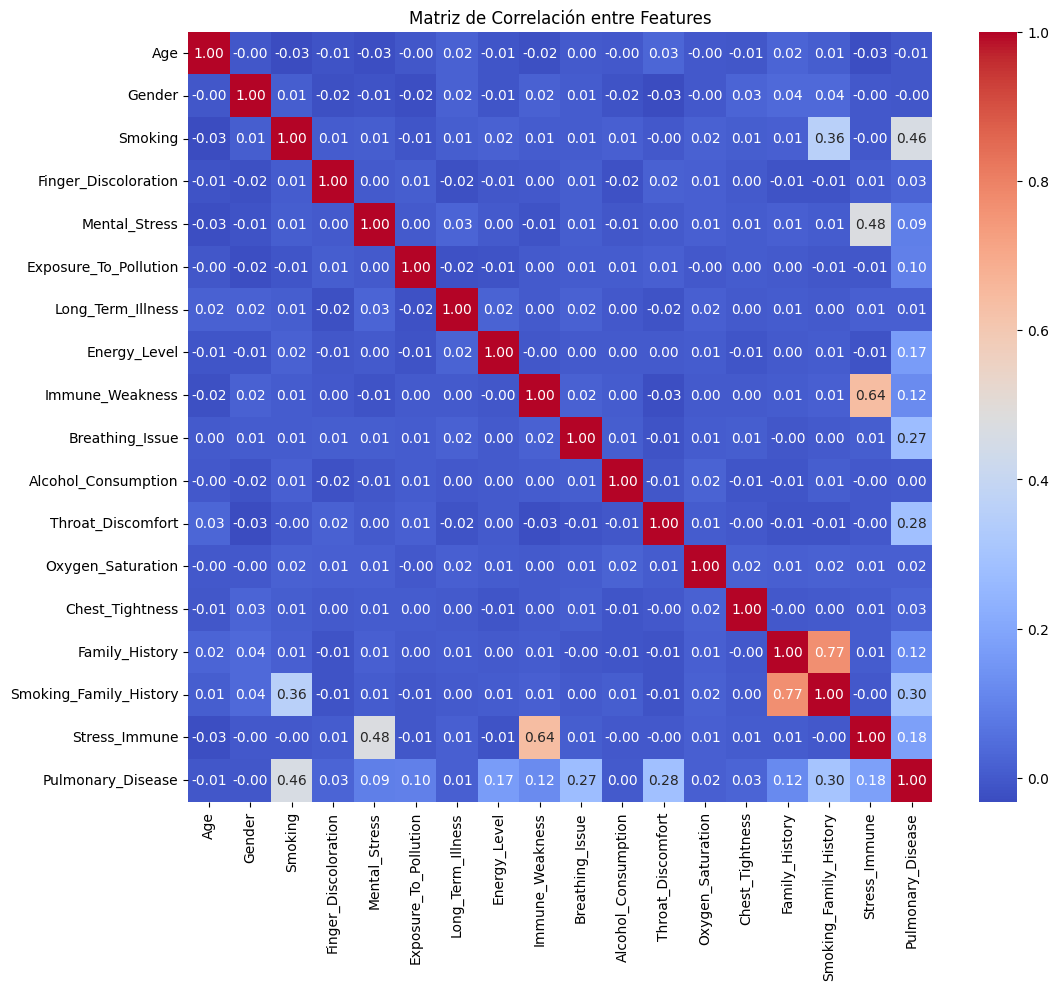

In [56]:
# prompt: hazme un grafico que se vea  de la corelacxion entre features

import matplotlib.pyplot as plt
import seaborn as sns

# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Crear un mapa de calor para visualizar la correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Features')
plt.show()


In [57]:
from sklearn.preprocessing import MinMaxScaler
import joblib

# Seleccionar las columnas a normalizar
columns_to_normalize = ["Age", "Energy_Level", "Oxygen_Saturation"]

# Inicializar el escalador
scaler = MinMaxScaler()

# Aplicar normalización a las columnas
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Guardar el escalador para su uso en la aplicación
joblib.dump(scaler, "scaler.joblib")

print("Columnas normalizadas y escalador guardado exitosamente.")


Columnas normalizadas y escalador guardado exitosamente.


In [58]:
df.head()

,Age,Gender,Smoking,Finger_Discoloration,Mental_Stress,Exposure_To_Pollution,Long_Term_Illness,Energy_Level,Immune_Weakness,Breathing_Issue,Alcohol_Consumption,Throat_Discomfort,Oxygen_Saturation,Chest_Tightness,Family_History,Smoking_Family_History,Stress_Immune,Pulmonary_Disease
0,0.703704,1,1,1,1,1,0,0.601902,0,0,1,1,0.693695,1,0,0,0,0
1,0.944444,1,1,0,0,1,1,0.206600,1,1,0,1,0.939632,0,0,0,0,1
2,0.518519,1,1,0,0,0,0,0.670003,0,1,1,0,0.489491,0,0,0,0,0
3,0.259259,0,1,0,1,1,0,0.678128,0,1,0,1,0.532876,0,0,0,0,1
4,0.777778,0,1,1,1,1,1,0.676107,0,1,0,1,0.189621,0,0,0,0,1


In [59]:
#separa X y y
X = df.drop('Pulmonary_Disease', axis=1)
y = df['Pulmonary_Disease']
X

,Age,Gender,Smoking,Finger_Discoloration,Mental_Stress,Exposure_To_Pollution,Long_Term_Illness,Energy_Level,Immune_Weakness,Breathing_Issue,Alcohol_Consumption,Throat_Discomfort,Oxygen_Saturation,Chest_Tightness,Family_History,Smoking_Family_History,Stress_Immune
0,0.703704,1,1,1,1,1,0,0.601902,0,0,1,1,0.693695,1,0,0,0
1,0.944444,1,1,0,0,1,1,0.206600,1,1,0,1,0.939632,0,0,0,0
2,0.518519,1,1,0,0,0,0,0.670003,0,1,1,0,0.489491,0,0,0,0
3,0.259259,0,1,0,1,1,0,0.678128,0,1,0,1,0.532876,0,0,0,0
4,0.777778,0,1,1,1,1,1,0.676107,0,1,0,1,0.189621,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.037037,0,1,1,0,0,1,0.713809,1,1,1,1,0.293416,0,1,1,0
4996,0.925926,0,1,1,1,1,1,0.325815,0,1,1,1,0.371336,0,0,0,0
4997,0.388889,1,0,0,1,0,0,0.727957,1,0,0,0,1.000000,0,0,0,1
4998,0.851852,1,0,1,0,0,0,0.244352,0,1,0,1,0.612303,1,0,0,0


In [60]:
#entrena el model0
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


<BarContainer object of 2 artists>

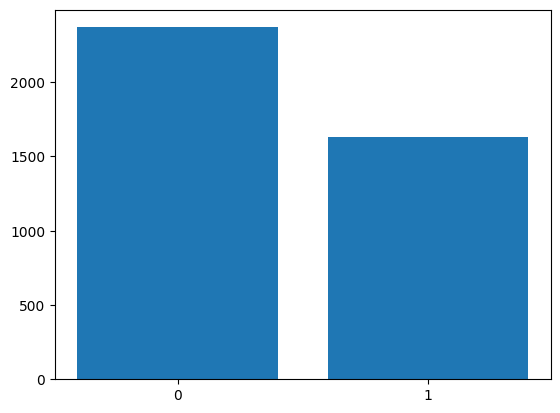

In [61]:
#grafico balanceo de datos
import matplotlib.pyplot as plt

plt.bar(['0', '1'], [y_train.value_counts()[0], y_train.value_counts()[1]])

In [62]:
# prompt: cantidad de 1 y 0

# Contar la cantidad de 0 y 1 en y_train
count_0 = y_train.value_counts()[0]
count_1 = y_train.value_counts()[1]

print("Cantidad de 0 en y_train:", count_0)
print("Cantidad de 1 en y_train:", count_1)


Cantidad de 0 en y_train: 2370
Cantidad de 1 en y_train: 1630


In [63]:
#balanceo de datos
from imblearn.over_sampling import SMOTE

from collections import Counter

smote = SMOTE(k_neighbors=5, random_state=42)
X_train_resampled, y_train_resampled  = smote.fit_resample(X_train, y_train)



<BarContainer object of 2 artists>

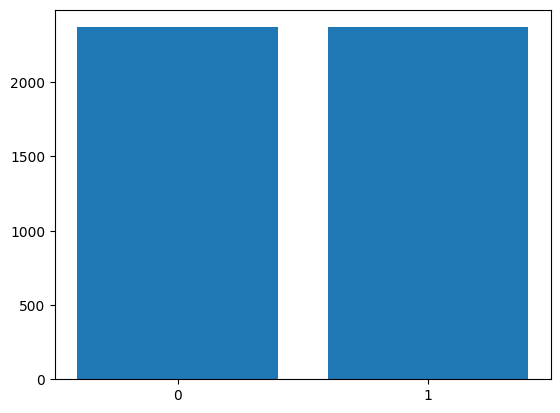

In [64]:
#grafico balanceo de datos
import matplotlib.pyplot as plt

plt.bar(['0', '1'], [y_train_resampled.value_counts()[0], y_train_resampled.value_counts()[1]])

In [65]:
#modelo con gaussianNB con datos balanceados

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gnb = GaussianNB()
gnb.fit(X_train_resampled, y_train_resampled)
y_pred = gnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.839


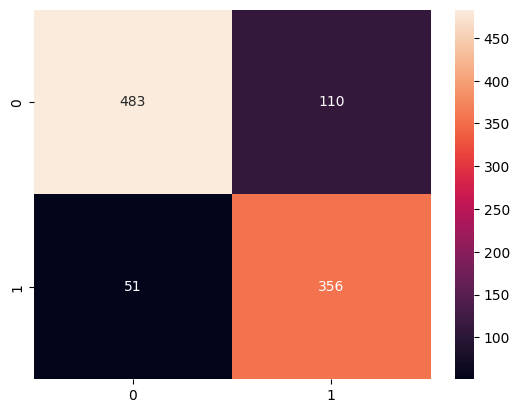

In [66]:
#caja de confusion
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [67]:
#modelo con gaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.852


In [68]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.90      0.84      0.87       593
           1       0.79      0.87      0.83       407

    accuracy                           0.85      1000
   macro avg       0.85      0.85      0.85      1000
weighted avg       0.86      0.85      0.85      1000



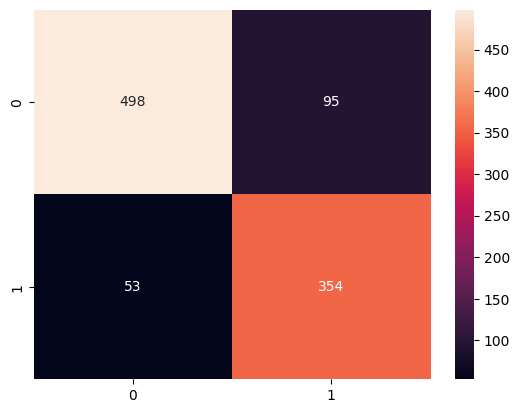

In [69]:
#caja de confusion
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

Accuracy (BernoulliNB con datos balanceados): 0.833


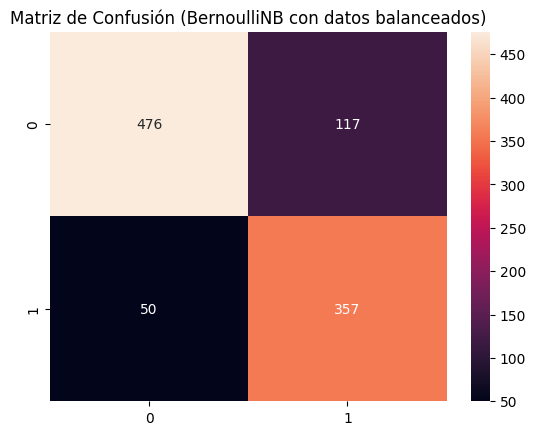

Accuracy (BernoulliNB sin balancear datos): 0.818


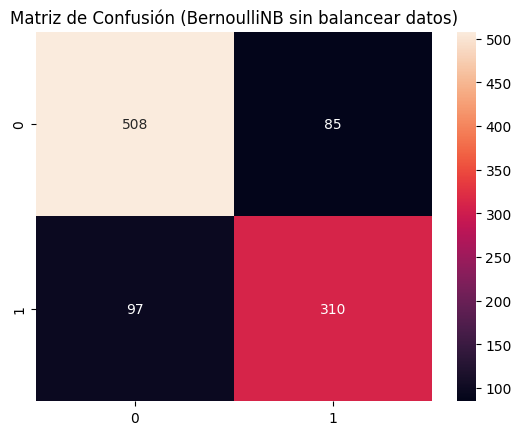

In [70]:
# prompt: genera el modelo con bernulli y matriz de confusion

from sklearn.naive_bayes import BernoulliNB

# Modelo con BernoulliNB con datos balanceados
bnb = BernoulliNB()
bnb.fit(X_train_resampled, y_train_resampled)
y_pred = bnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy (BernoulliNB con datos balanceados):", accuracy)

# Matriz de confusión (BernoulliNB con datos balanceados)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Matriz de Confusión (BernoulliNB con datos balanceados)')
plt.show()


# Modelo con BernoulliNB sin balancear datos
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred = bnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy (BernoulliNB sin balancear datos):", accuracy)

# Matriz de confusión (BernoulliNB sin balancear datos)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Matriz de Confusión (BernoulliNB sin balancear datos)')
plt.show()


Accuracy (Multinomial con datos balanceados): 0.73


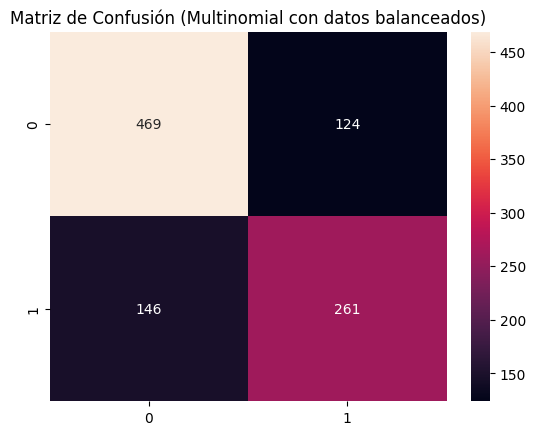

Accuracy (Multinomial sin balancear datos): 0.691


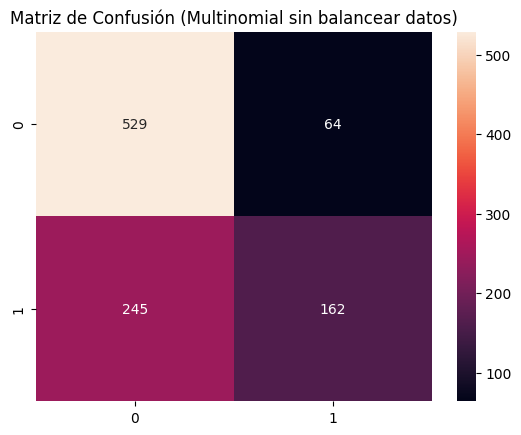

In [71]:
# prompt: genera el modelo con multinmimialnb y matriz de confusion

from sklearn.naive_bayes import MultinomialNB



# Modelo con BernoulliNB con datos balanceados
bnb = MultinomialNB()
bnb.fit(X_train_resampled, y_train_resampled)
y_pred = bnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy (Multinomial con datos balanceados):", accuracy)

# Matriz de confusión (Multinomial con datos balanceados)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Matriz de Confusión (Multinomial con datos balanceados)')
plt.show()


# Modelo con Multinomial sin balancear datos
bnb = MultinomialNB()
bnb.fit(X_train, y_train)
y_pred = bnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy (Multinomial sin balancear datos):", accuracy)

# Matriz de confusión (Multinomial sin balancear datos)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Matriz de Confusión (Multinomial sin balancear datos)')
plt.show()




🔹 Accuracy (Balanceado): 0.911

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.92       593
           1       0.89      0.89      0.89       407

    accuracy                           0.91      1000
   macro avg       0.91      0.91      0.91      1000
weighted avg       0.91      0.91      0.91      1000



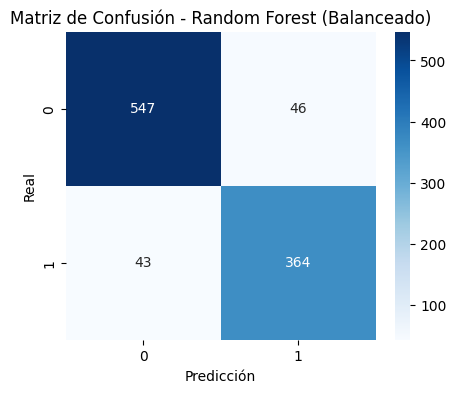


🔹 Accuracy (Sin Balancear): 0.903

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.92       593
           1       0.89      0.87      0.88       407

    accuracy                           0.90      1000
   macro avg       0.90      0.90      0.90      1000
weighted avg       0.90      0.90      0.90      1000



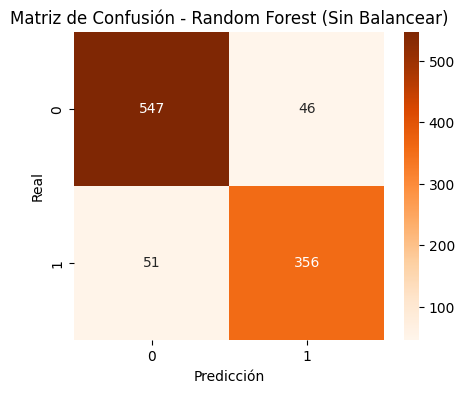

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# 🚀 Entrenar modelo con los datos balanceados
# Asegúrate de haber definido X_train_resampled, y_train_resampled antes de ejecutar esto

# 🔹 Entrenar Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_resampled, y_train_resampled)
y_pred_balanced = rf.predict(X_test)

# 📊 Evaluar modelo con datos balanceados
print("\n🔹 Accuracy (Balanceado):", accuracy_score(y_test, y_pred_balanced))
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred_balanced))

# 📌 Matriz de Confusión para datos balanceados
cm_balanced = confusion_matrix(y_test, y_pred_balanced)
plt.figure(figsize=(5,4))
sns.heatmap(cm_balanced, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Random Forest (Balanceado)")
plt.show()

# 🚀 Entrenar modelo con los datos originales (sin balancear)
rf_original = RandomForestClassifier(n_estimators=100, random_state=42)
rf_original.fit(X_train, y_train)
y_pred_original = rf_original.predict(X_test)

# 📊 Evaluar modelo con datos sin balancear
print("\n🔹 Accuracy (Sin Balancear):", accuracy_score(y_test, y_pred_original))
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred_original))

# 📌 Matriz de Confusión para datos sin balancear
cm_original = confusion_matrix(y_test, y_pred_original)
plt.figure(figsize=(5,4))
sns.heatmap(cm_original, annot=True, fmt='d', cmap='Oranges', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Random Forest (Sin Balancear)")
plt.show()


In [73]:
# prompt: guarda el modelo RandomForestClassifier con datos balanceados

# Guardar el modelo RandomForestClassifier con datos balanceados
joblib.dump(rf, "random_forest_balanced.joblib")

print("Modelo RandomForestClassifier con datos balanceados guardado exitosamente.")


Modelo RandomForestClassifier con datos balanceados guardado exitosamente.


                   Feature  Importance
2                  Smoking    0.221753
7             Energy_Level    0.146470
11       Throat_Discomfort    0.106106
9          Breathing_Issue    0.106090
12       Oxygen_Saturation    0.089914
0                      Age    0.084253
15  Smoking_Family_History    0.051590
16           Stress_Immune    0.032934
5    Exposure_To_Pollution    0.030607
14          Family_History    0.020983
4            Mental_Stress    0.016302
8          Immune_Weakness    0.015890
1                   Gender    0.015879
6        Long_Term_Illness    0.015593
10     Alcohol_Consumption    0.015581
13         Chest_Tightness    0.015462
3     Finger_Discoloration    0.014594


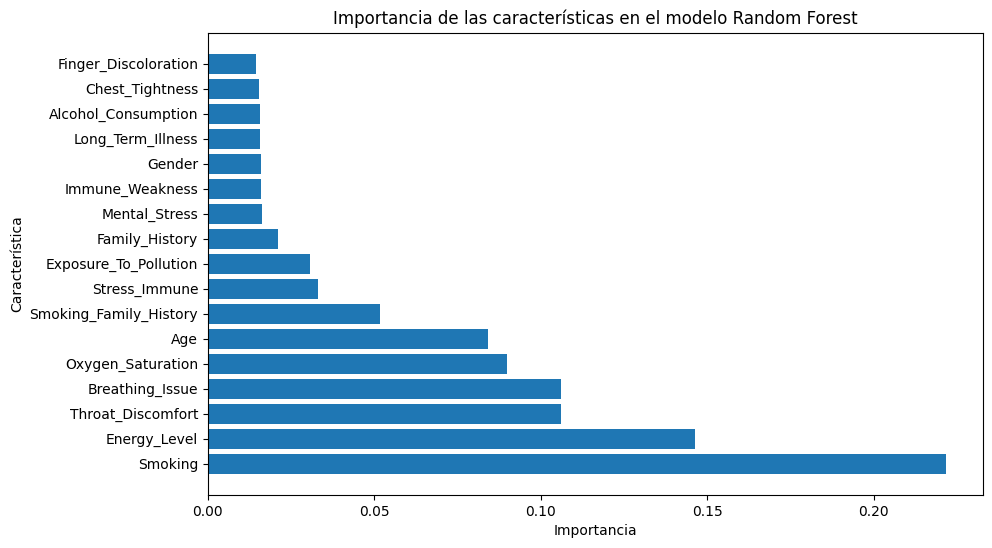

In [74]:
# prompt: muestrame la probabilidad de cada feature para predecir

# Obtener la importancia de las características del modelo Random Forest entrenado con datos balanceados
feature_importances = rf.feature_importances_

# Crear un DataFrame para visualizar la importancia de las características
feature_importance_df = pd.DataFrame({'Feature': X_train_resampled.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Mostrar la importancia de las características
print(feature_importance_df)

# Visualizar la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title('Importancia de las características en el modelo Random Forest')
plt.show()
